In [2]:
# ==  Basic import == #
# plot within the notebook
%matplotlib inline
# No annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as mpl

# Intrinsic dispersion

## Likelihood minimization of Gaussian Distribution


#### The data

In [4]:
sigma_int = 0.10
mu = -0.5
error = 0.12
error_noise = 0.03 # This means that the errors will be 0.12 +/- 0,03
npoints = 1000

In [5]:
errors = np.random.normal(loc=error, scale=error_noise, size=npoints)
data   = np.random.normal(loc=mu, scale=sigma_int, size=npoints) + np.random.normal(loc=0,scale=errors)

<Container object of 3 artists>

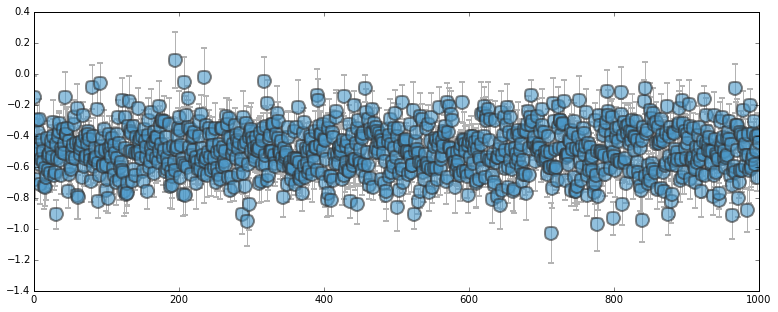

In [6]:
fig = mpl.figure(figsize=[13,5])
ax = fig.add_subplot(111)
ax.errorbar(np.arange(npoints), data, yerr=errors, marker="o", ls="None",
            mfc=mpl.cm.Blues(0.6,0.6), mec=mpl.cm.binary(0.8,1), ecolor="0.7",
           ms=13, mew=2)

# Formula to adjust

## The Probability to measure _x_ with and error _dx_

#### The Theory
The probability _p_ to observe a point _i_ with a value _x_ given it's gaussian error _dx_ and assuming the system has an intrinsic dispersion _sigma_ is:

$$
p = G(x_i\ |\ \mu,\ \sqrt{dx_i ^2+ sigma^2})
$$
where $G$ is the gaussian probability distribution function (pdf).

#### The Code
In Python you can measure $p$ using the scipy.stats norm class:
```python
from scipy.stats import norm
import numpy as np

p = norm.pdf(x, loc= mu, scale= np.sqrt(dx**2 + sigma**2))
```

## The Likelihood of your sample

The likelihood to observe your sample given your model (here $\mu$ and $\sigma$) is simply the product of the 
probability to observe every given points of your sample. The best model with then be the one maximizing the Likelihood $\mathcal{L}$:
$$
\mathcal{L} = \prod p_i
$$

In practive we work with the log of the likelihood such that the formula is based on the sum of the log of the individual probabilities:

$$
\log\mathcal{L} = \sum \log(p_i)
$$


In [46]:
from scipy.optimize import minimize
from scipy import stats
class WeightedMean( object ):
    """ Class that allows us to fit for a weighted mean including intrinsic dispersion"""
        
    PARAMETERS = [mu, sigma_int]
    
    def __init__(self, data, errors):
        """ Initialize the class 
        Parameters
        ----------
        data: [array]
            measured value
        errors: [array]
            measured errors
            
        Return
        ------
        Void
        """
        # ---------------
        # Test the input
        if len(data) != len(errors):
            raise ValueError("data and errors must have the same size (given %d vs. %d)"%(len(data),len(errors)))
            
        self.data   = np.asarray(data)
        self.errors = np.asarray(errors)
        self.npoints = len(self.data)
        
    def set_guesses(self,guesses):
        """ Set the 2 guesses for the fit: mu and sigma_intrinsic
        Return
        ------
        Void
        """
        if len(guesses) != len(self.PARAMETERS):
            raise ValueError("guess must have %d entries (%d given)"%(len(self.PARAMETERS), len(guesses)))
            
        self.guesses = np.asarray(guesses)
        
    def fit(self, guesses):
        """ fit the parameters to the data
        This uses scipy.optimize.minimize
        """
        self.set_guesses(guesses)
        
        
        self.fitout = minimize(self.minus_loglikelihood, self.guesses)
        print self.fitout
        
    def minus_loglikelihood(self, parameters):
        """ The sum of the minus loglikelihood used for the fit
        Parameters
        ----------
        parameters: [array]
            list of the values for the free parameters of the model
        Return
        ------
        float (- sum loglikelihood)
        """
        mu, sigma_int = parameters
        return - np.sum( np.log( stats.norm.pdf(self.data, loc=mu, scale=np.sqrt(sigma_int**2 + self.errors**2))   ))
        
            

In [47]:
wmean = WeightedMean(data,errors)

In [48]:
wmean.fit()

   status: 2
  success: False
     njev: 25
     nfev: 101
 hess_inv: array([[  1.88231492e-05,   8.98157673e-07],
       [  8.98157673e-07,   2.76810002e-05]])
      fun: -421.8171143756359
        x: array([-0.4974172 ,  0.10252813])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([  3.81469727e-05,  -2.67028809e-05])


In [50]:
np.sqrt( 2.76810002e-05)

0.0052612736290749982